---
title: "DATA210P HW2 - Bike Sharing (hour.csv): Linear Modeling, Selection, Validation, and Ridge & Lasso"
author: "Joe Nguyen, Haesung Becker, Jared Lyon, Tao Chen"
format:
  pdf:
    number-sections: true
    fig-pos: "H"
    toc: true
    toc-depth: 3
    df-print: pandas
    keep-tex: true
execute:
  echo: true
  warning: false
  message: false
fig-width: 6.5
fig-height: 4.2
dpi: 300
---

Load libraries & packages

In [50]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
from textwrap import dedent

Import UCI ML Repo and load dataset (hour.csv). We decided to use the hour.csv dataset for this homework assignment because it contains more data points for a more robust analysis.

In [51]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
bike_sharing = fetch_ucirepo(id=275) 
  
# data (as pandas dataframes) 
X = bike_sharing.data.features 
y = bike_sharing.data.targets 
  
# metadata 
# print(bike_sharing.metadata) 
  
# variable information 
# print(bike_sharing.variables) 


Initialize dataframe and perform initial data exploration

In [54]:
#| output: asis

df = X.copy()
df = df.join(y)

df.shape, df.columns[:14]

wide = df.head()

latex = wide.to_latex(index=False, escape=True)
print(r"\begin{table}[H]")
print(r"\centering")
print(r"\resizebox{\textwidth}{!}{%")
print(latex)
print(r"}")
print(r"\caption{First rows of the dataset.}")
print(r"\label{tab:first5-hourly}")
print(r"\end{table}")


\begin{table}[H]
\centering
\resizebox{\textwidth}{!}{%
\begin{tabular}{lrrrrrrrrrrrrr}
\toprule
dteday & season & yr & mnth & hr & holiday & weekday & workingday & weathersit & temp & atemp & hum & windspeed & cnt \\
\midrule
2011-01-01 & 1 & 0 & 1 & 0 & 0 & 6 & 0 & 1 & 0.240000 & 0.287900 & 0.810000 & 0.000000 & 16 \\
2011-01-01 & 1 & 0 & 1 & 1 & 0 & 6 & 0 & 1 & 0.220000 & 0.272700 & 0.800000 & 0.000000 & 40 \\
2011-01-01 & 1 & 0 & 1 & 2 & 0 & 6 & 0 & 1 & 0.220000 & 0.272700 & 0.800000 & 0.000000 & 32 \\
2011-01-01 & 1 & 0 & 1 & 3 & 0 & 6 & 0 & 1 & 0.240000 & 0.287900 & 0.750000 & 0.000000 & 13 \\
2011-01-01 & 1 & 0 & 1 & 4 & 0 & 6 & 0 & 1 & 0.240000 & 0.287900 & 0.750000 & 0.000000 & 1 \\
\bottomrule
\end{tabular}

}
\caption{First rows of the dataset.}
\label{tab:first5-hourly}
\end{table}


# Part 1: Linear Model and Interpretation

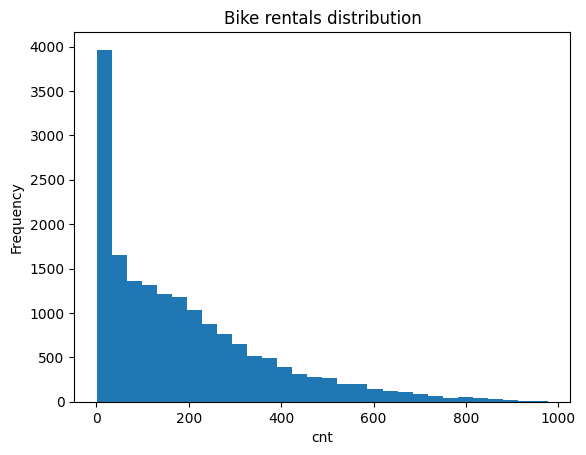

In [53]:
#| fig-cap: "Distribution of total bike rentals (cnt)."
#| label: fig-cnt-hist
#| fig-width: 7
#| fig-height: 4.5
#| fig-align: center


target = y.columns[0]

plt.figure()
plt.hist(df[target], bins=30)
plt.xlabel(target)
plt.ylabel("Frequency")
plt.title("Bike rentals distribution")
plt.show()
